In [1]:
!pip install keepa

In [2]:
import keepa
import numpy as np 

In [2]:
mykey = 'e6ihvarndmd2iee2bgeg60afm06gru9242g310tb4tv1kji72u57uon4us908d5h'
api = keepa.Keepa(mykey)

In [3]:
# Find the best seller of toy
bestsellers = []
toys= '165793011'
bestsellers = api.best_sellers_query(toys)


In [4]:
api.category_lookup(toys)

{'165793011': {'domainId': 1,
  'catId': 165793011,
  'name': 'Toys & Games',
  'children': [165795011, 219221011],
  'parent': 0,
  'highestRank': 31757276,
  'productCount': 6743703,
  'contextFreeName': None}}

In [5]:
 len(bestsellers)

500000

In [6]:
np.save('bestsellers.npy', bestsellers)

In [7]:
bestsellers = np.load('bestsellers.npy', allow_pickle=True)

In [8]:
#Save the top 300 products data
products_toys = api.query(bestsellers[0:300])
assert(len(products_toys) > 50)
assert(type(products_toys[0]) == dict)
np.save('product_toys.npy', products_toys)

In [9]:
# To load a product dictionary:
products_toys_d = np.load('product_toys.npy', allow_pickle=True)

In [10]:
#Display all Product Attributes
print('Product attributes: \n\n', list(products_toys_d[0].keys()))

Product attributes: 

 ['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'ean', 'upc', 'mpn', 'trackingSince', 'brand', 'label', 'department', 'publisher', 'productGroup', 'partNumber', 'studio', 'genre', 'model', 'color', 'size', 'edition', 'platform', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'hazardousMaterialType', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees

In [11]:
# Count how many products have a price history longer than 50

cnt = 0
for product in products_toys_d:
    if len(product['data']['AMAZON']) > 50:
        cnt += 1
print(cnt)

164


In [4]:
products = list(np.load('product_toys.npy', allow_pickle=True))
products.sort(key=(lambda product : len(product['data']['AMAZON'])), reverse=True)
products_50 = products[:50]
print('Average Number of tracked prices: ', sum([len((product['data']['AMAZON'])) for product in products_50])/50)

assert len(products_50[49]) >= 50

Average Number of tracked prices:  1394.26


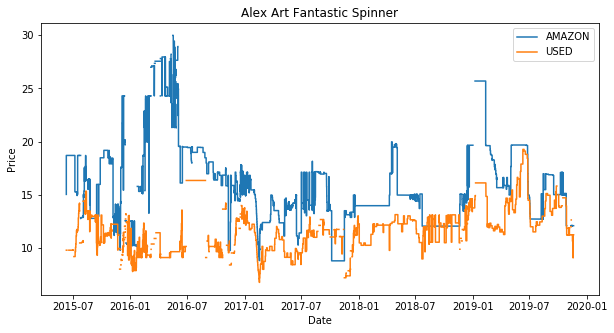

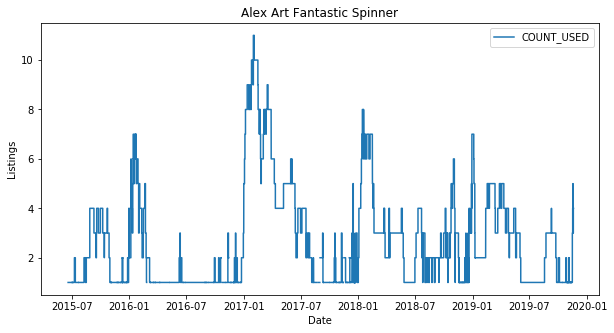

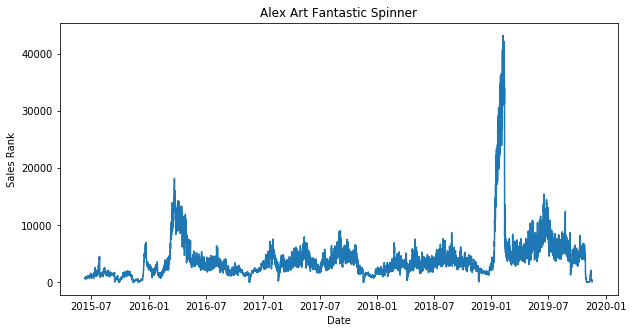

<Figure size 432x288 with 0 Axes>

In [14]:
# Example plot
keepa.plot_product(products_toys_d[25])

Product Title:  Hasbro Connect 4 Game 

Last price change:  4671100 



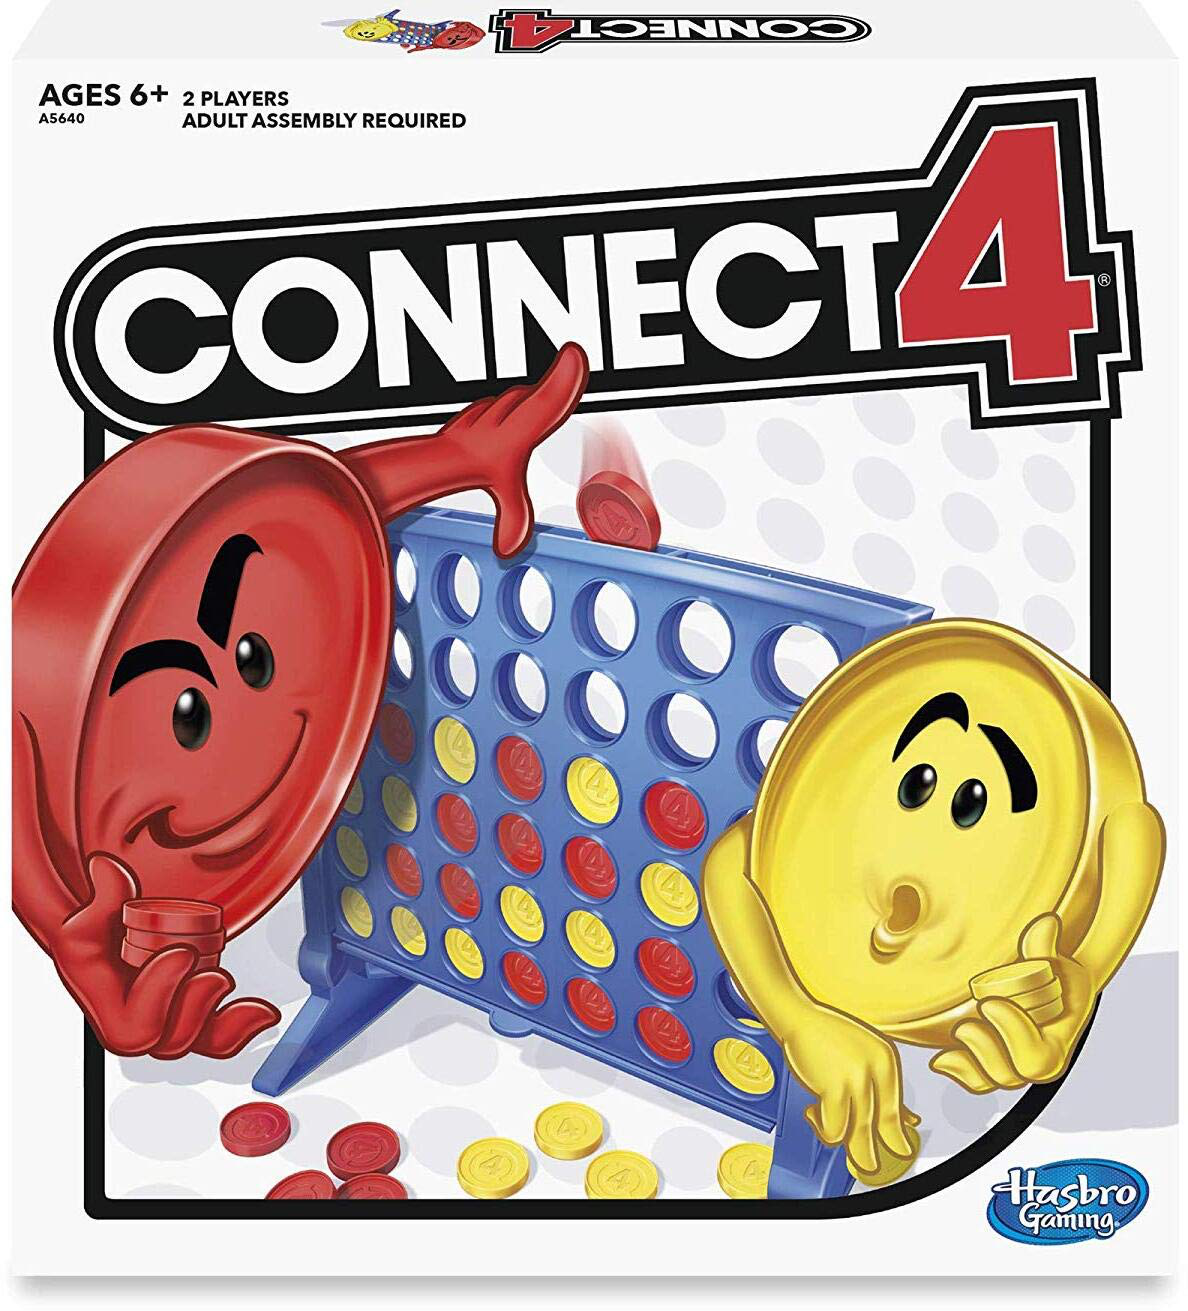

In [5]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

#Sample Product Information
product = products_50[24]
print('Product Title: ', product['title'], '\n')
print('Last price change: ', product['lastPriceChange'], '\n')

image_name = 'https://images-na.ssl-images-amazon.com/images/I/' + (product['imagesCSV'].split(',')[0])
response = requests.get(image_name)
img = Image.open(BytesIO(response.content), 'r')
display(img)